In [3]:
import idx2numpy 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Paths
train_images_path = 'samples/train-images-idx3-ubyte'
train_labels_path = 'samples/train-labels-idx1-ubyte'
test_images_path = 'samples/t10k-images-idx3-ubyte'
test_labels_path = 'samples/t10k-labels-idx1-ubyte'

In [6]:
# Converting idx to numpy
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)


In [7]:
# Visualization
def display_images(images, labels, num_images=20):
    # Dimensions for the subplot grid
    num_columns = 5
    num_rows = num_images // num_columns
    
    # Figure with subplot per image
    plt.figure(figsize=(10, 2 * num_rows))
    
    for i in range(num_images):
        plt.subplot(num_rows, num_columns, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Turn off axis ticks and labels
    plt.tight_layout()
    plt.show()

Training Set examples


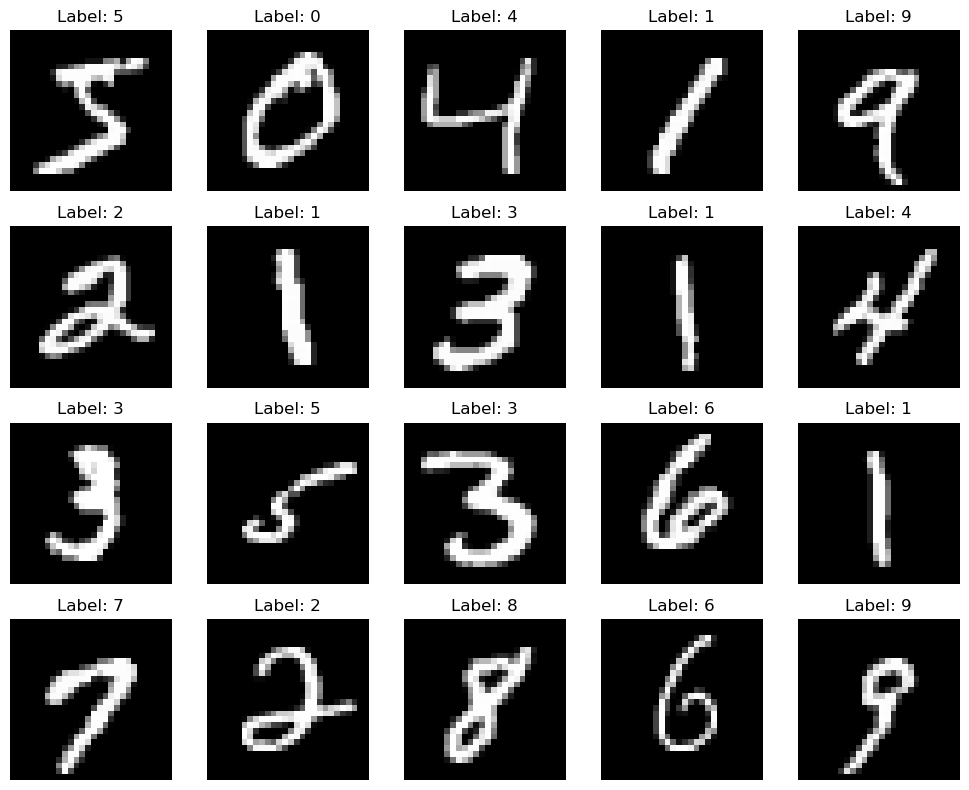

_______________________________________________________________________________________________________________________
Test set examples


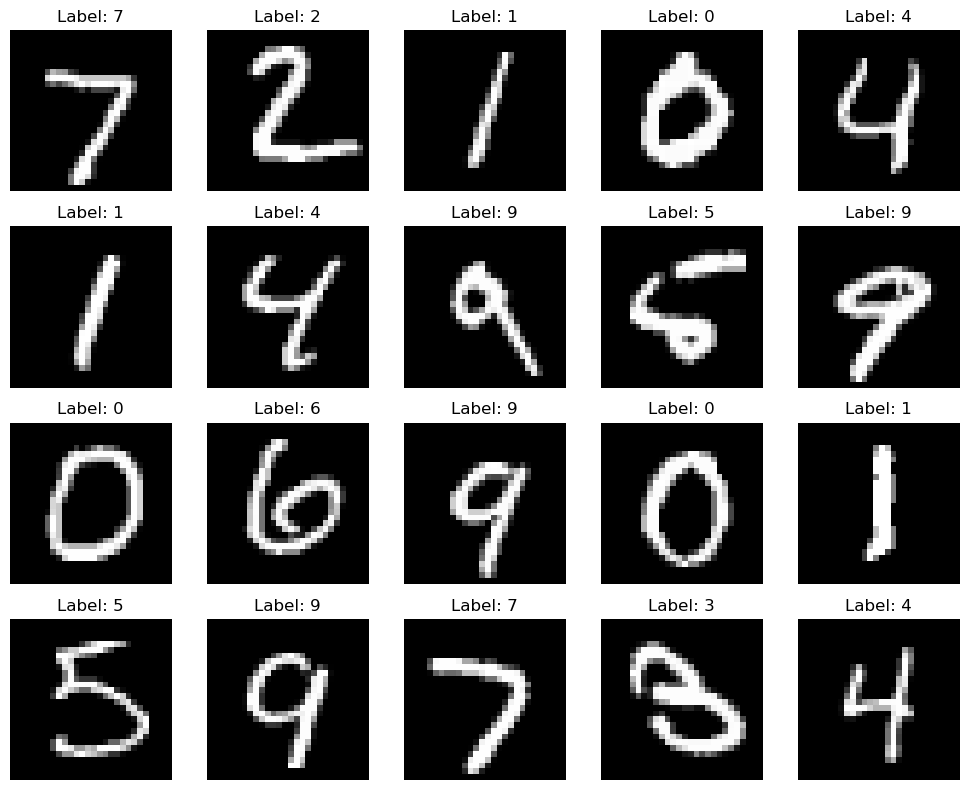

In [13]:
# Display 20 images from the training set
print('Training Set examples')
display_images(train_images, train_labels, num_images=20)
print('_______________________________________________________________________________________________________________________')
print('Test set examples')
# Display 20 images from the test set
display_images(test_images, test_labels, num_images=20)

In [51]:
import pandas as pd


def count_numbers_dict(lst):
    number_counts = {}
    for number in lst:
        if number in number_counts:
            number_counts[number] += 1
        else:
            number_counts[number] = 1
    return number_counts


train_counts_dict = count_numbers_dict(train_labels)
test_counts_dict = count_numbers_dict(test_labels)


# Prepare data for plotting
data = []
for key in set(train_counts_dict.keys()).union(test_counts_dict.keys()):
    data.append({'Label': key, 'Count': train_counts_dict.get(key, 0), 'Type': 'Train'})
    data.append({'Label': key, 'Count': test_counts_dict.get(key, 0), 'Type': 'Test'})

    
# Convert data into a pandas DataFrame
df = pd.DataFrame(data)


print("Train Labels Counts:")
for number, count in sorted(train_counts_dict.items()):
    print(f"Number {number}: {count} time(s)")

print("\nTest Labels Counts:")
for number, count in sorted(test_counts_dict.items()):
    print(f"Number {number}: {count} time(s)")



Train Labels Counts:
Number 0: 5923 time(s)
Number 1: 6742 time(s)
Number 2: 5958 time(s)
Number 3: 6131 time(s)
Number 4: 5842 time(s)
Number 5: 5421 time(s)
Number 6: 5918 time(s)
Number 7: 6265 time(s)
Number 8: 5851 time(s)
Number 9: 5949 time(s)

Test Labels Counts:
Number 0: 980 time(s)
Number 1: 1135 time(s)
Number 2: 1032 time(s)
Number 3: 1010 time(s)
Number 4: 982 time(s)
Number 5: 892 time(s)
Number 6: 958 time(s)
Number 7: 1028 time(s)
Number 8: 974 time(s)
Number 9: 1009 time(s)


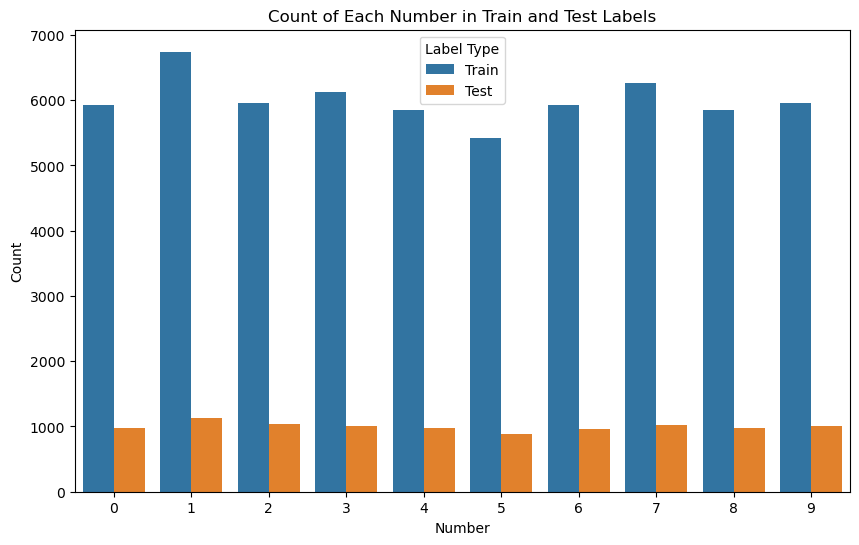

In [52]:
#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Label", y="Count", hue="Type", data=df.sort_values("Label"))
plt.title("Count of Each Number in Train and Test Labels")
plt.xlabel("Number")
plt.ylabel("Count")
plt.legend(title="Label Type")
plt.show()



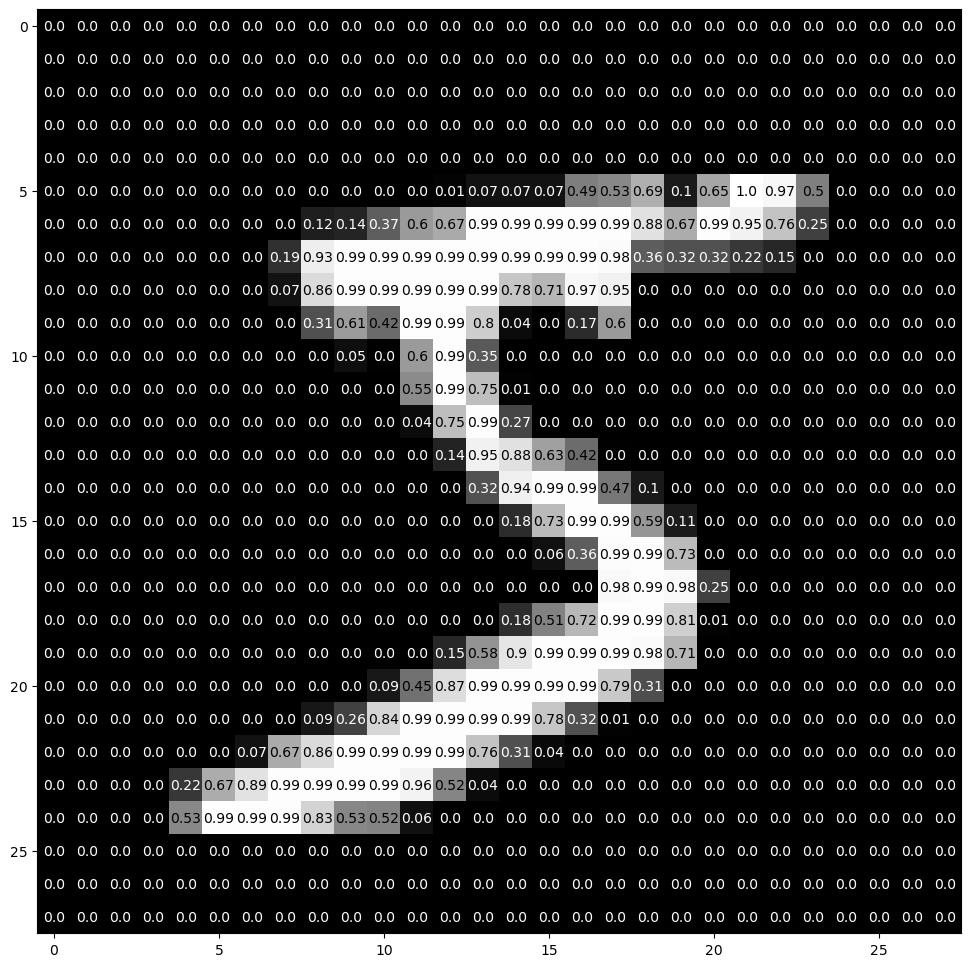

In [55]:
# Taken from SOHAM MUKHERJEE

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(train_images[0].reshape(28,28), ax)

The cell above shows the 2D shape of the numbers, displaying the number for each individual grid piece (28x28). The number is of range 0-255, after normalization thus between 0-1. 

# Data preprocessing
We need to preprocess the data for the following reasons: 

### Normalization
Normalization scales the input features to a similar range, which is important for:

Improving Gradient Descent Efficiency: Neural networks use gradient descent (or variants thereof) to adjust weights based on the error gradient. If features have vastly different scales, gradient descent can become inefficient, leading to longer training times or convergence to suboptimal solutions.

Enhancing Model Convergence: When input features are on a similar scale, the loss surface (the surface that the algorithm navigates to minimize the loss function) is more manageable, and the algorithm can converge more quickly to the minimum.

Preventing Distorted Weight Updates: Without normalization, features with larger scales dominate the weight updates, potentially leading to distorted models that don’t generalize well.

### Reshaping
Reshaping the data is necessary to match the input requirements of different types of neural network architectures:

For Dense Networks: Flattening images into vectors is common since each input neuron represents one feature (in this case, one pixel). This transformation is necessary because dense layers do not preserve the spatial structure of the images.

For Convolutional Neural Networks (CNNs): CNNs require the data to maintain its spatial structure (i.e., the 2D shape of images) because they extract features by applying filters across the image. Thus, images need to be reshaped to include a channel dimension, ensuring the model correctly interprets the input data's spatial and depth (color channel) dimensions.

In [16]:
# Print shapes after preprocessing
print("Unshaped training data shape for CNN:", train_images.shape)
print("Unshaped test data shape for CNN:", test_images.shape)


Reshaped training data shape for CNN: (60000, 28, 28)
Reshaped test data shape for CNN: (10000, 28, 28)


In [14]:
# Normalization
train_images = train_images / 255
test_images = test_images / 255
# The input image is made up of RGB pixels ranged between 0-255 we need to normalize that between 0-1, before using it in the model.

# Reshaping for CNN
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))

In [15]:
# Print shapes after preprocessing
print("Reshaped training data shape for CNN:", train_images_cnn.shape)
print("Reshaped test data shape for CNN:", test_images_cnn.shape)


Reshaped training data shape for CNN: (60000, 28, 28, 1)
Reshaped test data shape for CNN: (10000, 28, 28, 1)


# Creating the model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model=Sequential()
model.add(Conv2D(32,(3,3),activation='elu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation= 'elu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=10)


C:\Users\Gebruiker\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9114 - loss: 0.2956
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9816 - loss: 0.0591
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9896 - loss: 0.0345
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9933 - loss: 0.0220
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9951 - loss: 0.0148
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9965 - loss: 0.0120
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9965 - loss: 0.0111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9973 - loss: 0.0082
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9977 - loss: 0.0065
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9979 - loss: 0.0056


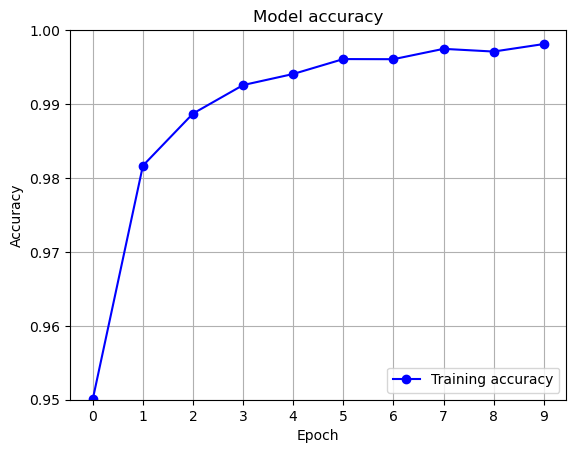

In [61]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values with a dot at each data point
plt.plot(history.history['accuracy'], 'bo-', label='Training accuracy')  

# Title and axis labels
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set the x-axis ticks to correspond to the epochs
plt.xticks(range(len(history.history['accuracy'])))

# Limits for the y-axis
plt.ylim([0.95, 1])

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

# Evaluation

In [63]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0893
Test loss: 0.0744696632027626
Test accuracy: 0.9850999712944031
